# Project 2: How to Keep your Burrito Warm

### First Draft

Alex Wenstrup and Robin Graham-Hayes

## Question

Suppose you buy a chipotle burrito (or any other burrito) for takeout, and want it to be as warm as possible when you get home. If you lead a lonely life of luxury and have a vacant but heated passenger seat in your car, you may be inclined to turn on your heated seat and strap your burrito in for a toasty ride. If, however, you don't find yourself in that position, are you better off leaving your burrito in the cooler, but insulated seat next to you, or on your lap, which starts off warmer, but will be cooled by your bloodstream drawing the heat throughout your body?

In [4]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [70]:
tBurrito=50#above room temp
tWall=50   #wall includes tortilla and foil
tLap=34     #Source: https://hypertextbook.com/facts/2001/AbantyFarzana.shtml
tCushion=22 #room temp

state = State(tBurritoCush=tBurrito,
              tBurritoLap=tBurrito,
              tWallCush=tBurrito,
              tWallLap=tBurrito,
              tLap=tLap,
              tCushion=tCushion,)

,values
tBurritoCush,50
tBurritoLap,50
tWallCush,50
tWallLap,50
tLap,34
tCushion,22


In [71]:
system = System(init = state,
               k_tortilla = 2.5e-2, #W/(mK)
               A = 0.027, #Contact area of burrito and cooling surface
               C_burrito = 3, #J/(g*deC)
               C_cushion = 2)

,values
init,tBurritoCush 50 tBurritoLap 50 tWallCus...
k_tortilla,0.025
A,0.027
C_burrito,3
C_cushion,2


In [59]:
state2 = State(tBurritoCush=tBurrito,
              tBurritoLap=tBurrito,    #create state
              tWallCush=tBurrito,
              tWallLab=tBurrito,
              tLap=tLap,
              tCushion=tCushion)

system2 = System(init = state2,
               k_burrito = 0.5, #W/(mK)
               k_cushion = 0.05, #Double the thermal conductivity of air
               A = 0.027, #Contact area of burrito and cooling surface
               C_burrito = 3, #J/(g*deC)
               C_cushion = 2,
               C_wall = 4,
               C_lap = 4)

,values
init,tBurritoCush 50 tBurritoLap 50 tWallCus...
k_burrito,0.5
k_cushion,0.05
A,0.027
C_burrito,3
C_cushion,2
C_wall,4
C_lap,4


In [35]:
def update_Cush(state, t, system):
    new_state = state
    
    energy_B1 = state.tBurritoCush * system.C_burrito
    energy_dB1 = system.k_tortilla * system.A * (state.tCushion - state.tWallCush ) / 0.023
    energy_dCushion = -1 * energy_dB1
    
    dB1 = energy_dB1 / system.C_burrito
    dCushion = energy_dCushion / system.C_cushion
    
    new_state.tBurritoCush += dB1
    new_state.tCushion += dCushion
    
    return new_state

In [61]:
def update_Cush2(state, t, system):
    new_state = state
    
    #Convert temperature to energy
    energy_B1 = state.tBurritoCush * system.C_burrito
    energy_W1 = state.tWallCush * system.C_wall
    energy_Cush = state.tCushion * system.C_cushion
    
    #Calculate changes in energy
    energy_dB1 = system.k_burrito * system.A * (state.tWallCush - state.tBurritoCush ) / 0.023
    energy_wall_gain = -1 * energy_dB1
    energy_wall_loss = system.k_cushion * system.A * (state.tCushion - state.tWallCush ) / 0.05
    energy_dCushion = -1 * energy_wall_loss
    
    #Convert energy changes back to temperature
    dB1 = energy_dB1 / system.C_burrito
    dCushion = energy_dCushion / system.C_cushion
    dW1 = (energy_wall_gain + energy_wall_loss) / system.C_wall
    
    #Update state
    new_state.tBurritoCush += dB1
    new_state.tCushion += dCushion
    new_state.tWallCush += dW1
    
    return new_state

In [62]:
def run_sim(system,t,update_func):
    
    frame = TimeFrame(columns=system.init.index)
    frame.row[0] = system.init
    
    for i in linrange(0, t):
        frame.row[i+1] = update_func(frame.row[i], i, system)
    
    return frame
        

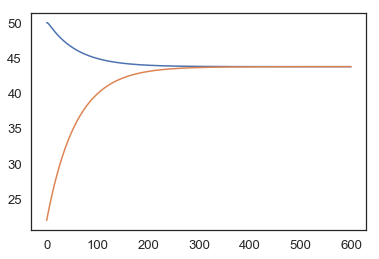

In [63]:
res = run_sim(system2,600,update_Cush2);
res.tBurritoCush.plot()
res.tCushion.plot()

In [72]:
def update_Lap(state, t, system):
    new_state = state
    
    #Convert temperature to energy
    energy_B2 = state.tBurritoLap * system.C_burrito
    energy_W2 = state.tWallLap * system.C_wall
    energy_Leg = state.tLeg * system.C_leg
    
    #Calculate changes in energy
    energy_dB2 = system.k_burrito * system.A * (state.tWallLeg - state.tBurritoLap ) / 0.023
    energy_wall_gain = -1 * energy_dB2
    energy_wall_loss = system.k_cushion * system.A * (state.tLeg - state.tWallLeg ) / 0.05
    energy_dLeg = -1 * energy_wall_loss
    energy_dLeg += 0.5 * (37 - state.tLeg)
    
    #Convert energy changes back to temperature
    dB2 = energy_dB2 / system.C_burrito
    dLeg = energy_dLeg / system.C_cushion
    dW2 = (energy_wall_gain + energy_wall_loss) / system.C_wall
    
    #Update state
    new_state.tBurritoCush += dB2
    new_state.tCushion += dLeg
    new_state.tWallCush += dW2
    
    return new_state

In [73]:
res = run_sim(system2,600,update_Lap);
res.tBurritoLap.plot()
res.tLap.plot()

AttributeError: 'State' object has no attribute 'tWallLap'

#### Sources
- https://hypertextbook.com/facts/2001/AbantyFarzana.shtml
- https://www.sciencedirect.com/science/article/pii/S026087740600392X